In [1]:
#Sebastian Russo 79117092
#Artificial Intelligence

#Import necessary libraries
#Library to manipulate and analyze datasets 
import pandas as pand 

#Library to manipulate and anlyze datasets but in numpy arrays and for scientific computing in Python
import numpy as np

#------------------------------------------------------------------------------------------------
#Import KNN model using the training set and required metrics
#Library to import only to split datasets into random train and test subsets
from sklearn.model_selection import train_test_split

#self-explanatory
from sklearn.neighbors import KNeighborsClassifier

#To import the class in for feature scaling (standardize the range of independent variables)
from sklearn.preprocessing import StandardScaler #CCOMPLETELY OPTIONAL

#From the metrics module, import accurracy, f1, precision, recall and classification report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
#------------------------------------------------------------------------------------------------
#Imports for Confusion Matrix and other data visualization
#Library to make python matplotlib work like MATLAB
import matplotlib.pyplot as matplib  

#Library for confusion matrix visualization
from sklearn.metrics import confusion_matrix  

#Library for data visualization and correlation matrix
import seaborn as sns 

c:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Import data set
dfperpurch= pand.read_csv("Social_Network_Ads.csv",index_col=0) 
#Nothing else necessary since it is a .csv, has header and "," as delimiters
#index_col=0 will set the column at location 0 "id" as the index for all rows in the dataset

#View shape of dataset
print(dfperpurch.shape)

#Analyze dataset
dfperpurch.head()

(400, 4)


,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0


In [3]:
#Check if there is any missing values in the data
nummissingvalues=dfperpurch.isna().sum()

#Print to see the missing values
print(nummissingvalues)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [4]:
#Convert Categorical data from Gender column into numerical variables
dfperpurch["Gender"]=dfperpurch["Gender"].map({"Male":0 , "Female":1})

#Re-Analyze dataset
dfperpurch.head()

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,0,19,19000,0
15810944,0,35,20000,0
15668575,1,26,43000,0
15603246,1,27,57000,0
15804002,0,19,76000,0


In [5]:
#Split dataset into features for X and Y 
Xvariable=dfperpurch.iloc[:,:3] #From Pregnancies to Age
Yvariable=dfperpurch.iloc[:,-1] #Just Outcome

#Check size for both 
print("Idependent variables:",Xvariable.shape)

print("Dependent variables:",Yvariable.shape)

Idependent variables: (400, 3)
Dependent variables: (400,)


In [6]:
#Split the Independent and Dependent variables into training and testing sets (80%, 20%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xvariable,Yvariable,test_size=0.2,random_state=0)

#Verify the shape for each split
print("Xtrain set:",Xtrain.shape)
print("Xtest set:",Xtest.shape)
print("Ytrain set:",Ytrain.shape)
print("Ytest set:",Ytest.shape)

Xtrain set: (320, 3)
Xtest set: (80, 3)
Ytrain set: (320,)
Ytest set: (80,)


In [7]:
#Feature scaling for better performance
Xtrain=StandardScaler().fit_transform(Xtrain)
Xtest=StandardScaler().fit_transform(Xtest)

In [8]:
#Create a model to classify diabetic or not:
KNNclassif= KNeighborsClassifier(n_neighbors=8, p=2,metric='euclidean')
#n_neighbors is k value 8 is the best
KNNclassif.fit(Xtrain,Ytrain)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [9]:
#Predict the outcome
predictY= KNNclassif.predict(Xtest)

#Check real values vs the predicted values
print("Actual values",Ytest.values[0:30])
print("Predict values",predictY[0:30])

Actual values [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0]
Predict values [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0]


Simple confusion Matrix
[[55  3]
 [ 1 21]]


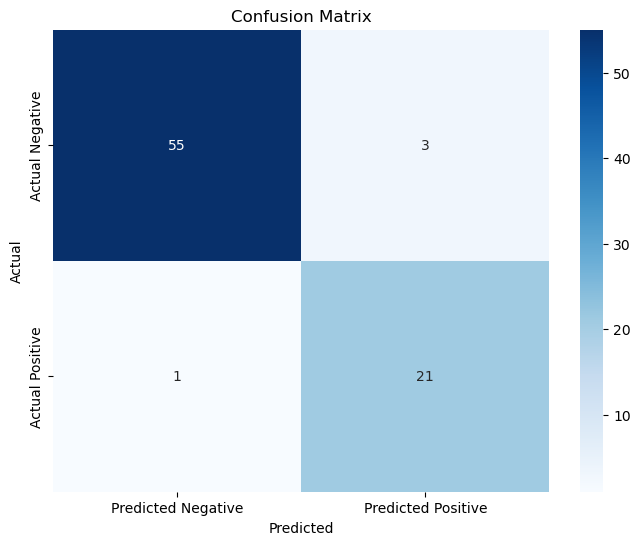

In [10]:
#Create confusion matrix
confmat=confusion_matrix(Ytest,predictY)

#Print confusion matrix
print("Simple confusion Matrix")
print(confmat)

#Create a heatmap to visualize the confusion matrix
matplib.figure(figsize=(8, 6))
sns.heatmap(confmat, annot=True, fmt='d',
            cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
matplib.xlabel('Predicted')
matplib.ylabel('Actual')
matplib.title('Confusion Matrix')
matplib.show()

In [11]:
#Check acurracy of this model (all same as Logistic regression)
acurracy= accuracy_score(Ytest,predictY) #Ranges (0,1), the closer to 1 the better
print("Acurracy: ",acurracy)

# Calculate precision
precision = precision_score(Ytest, predictY)
print('Precision:', precision)
 
# Calculate recall
recall = recall_score(Ytest, predictY)
print('Recall:', recall)
 
# Calculate F1 score
f1 = f1_score(Ytest, predictY)
print('F1 Score:', f1)

# Print the classification report
clfrep= classification_report(Ytest,predictY)
print(clfrep)

Acurracy:  0.95
Precision: 0.875
Recall: 0.9545454545454546
F1 Score: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

